In [5]:
import cv2
from matplotlib import pyplot as plt
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import numpy as np
from PIL import Image
from PIL import ImageFilter
from matplotlib import animation
from PIL import ImageEnhance

from tkinter import filedialog
import tkinter as tk

import matplotlib.patches as patches

import pickle

from os import sys

import matplotlib.pyplot as plt
import argparse

from statistics import mean
import os

%matplotlib inline

# for loading array 
from scipy.interpolate import interp1d
from scipy.io import loadmat
from scipy import signal as sig
import pandas as pd
import numpy as np
from scipy.signal import filtfilt, butter


sys.path.append(r'C:\Users\Nicolas\Documents\GitHub\WorkScripts')
sys.path.append(r'C:\Users\Timothe\NasgoyaveOC\Professionnel\TheseUNIC\WorkScripts')


from LibrairieNico.HitsFctClass import smooth, calculateNewSize


[ 195  259  316  352  388  423  451  478  511  540  568  596  639  677  724
  764  793  823  849  879  910  934  962  992 1022 1053 1079 1110 1143 1174
 1206 1267]
0.02 [ 195  259  352  388  423  451  478  511  540  568  596  639  677  724  764
  793  823  849  879  910  934  962  992 1022 1053 1079 1110 1143 1174 1206
 1267]
0.03 [ 195  259  352  388  423  451  478  511  540  568  596  639  677  724  764
  793  823  849  879  910  934  962  992 1022 1053 1079 1110 1143 1174 1206
 1267]
0.04 [ 195  259  352  388  423  451  478  511  540  568  596  639  677  724  764
  793  823  849  879  910  934  962  992 1022 1053 1079 1110 1143 1174 1206
 1267]
0.05 [ 195  259  352  388  423  451  478  511  540  568  596  639  677  724  764
  793  823  849  879  910  934  962  992 1022 1053 1079 1110 1143 1174 1206
 1267]
0.060000000000000005 [ 195  259  352  388  423  451  478  511  540  568  596  639  677  724  764
  793  823  849  879  910  934  962  992 1022 1053 1079 1110 1143 1174 1206
 1267]


([<matplotlib.axis.XTick at 0x1ae8220e320>,
 <a list of 26 Text xticklabel objects>)

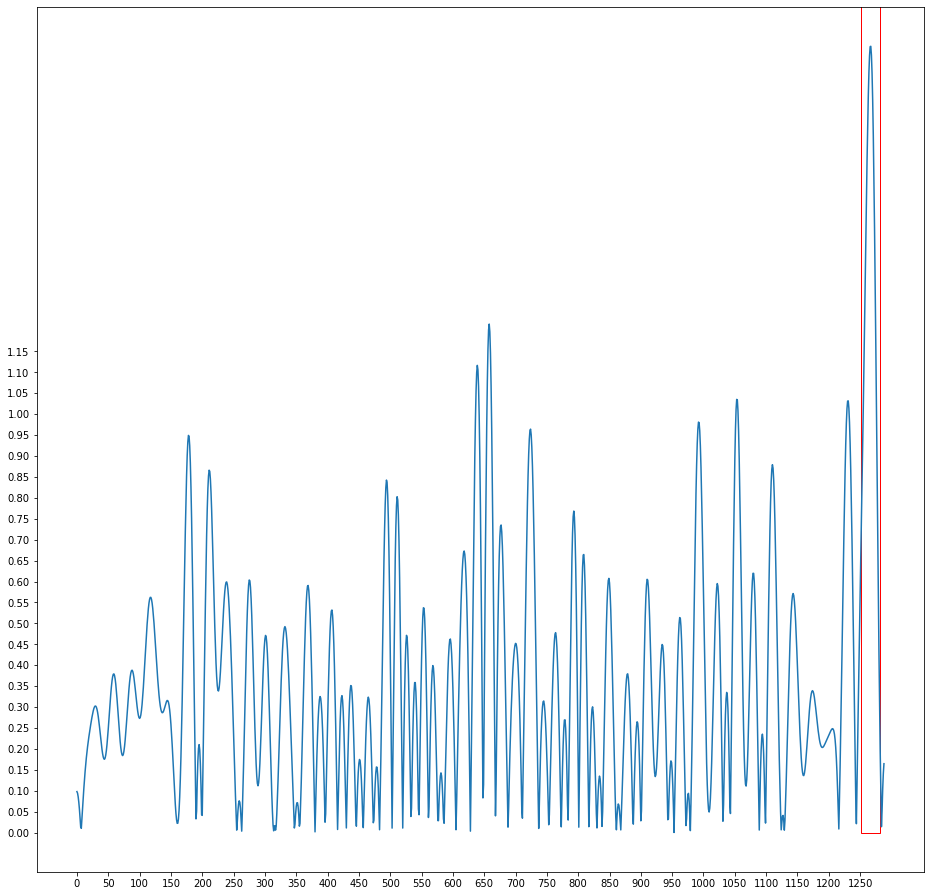

In [7]:
##Rendre la detection des peaks modulable###
##FindRefPeacksObj2 mOdulable###



#video_path =  r"C:\Users\Nicolas\Desktop\Test_Hit\Mouse25_2020-02-07T11.15.51.avi"
video_path =  r"D:\BehavioralVideos\Whisker_Video\Whisker_Topview\Expect_1\Mouse25\200207_1\Mouse25_2020-02-07T11.15.51.avi"

HandleBEHAV = cv2.VideoCapture(video_path, 0)


length = int(HandleBEHAV.get(cv2.CAP_PROP_FRAME_COUNT))


_ , IMG1 = HandleBEHAV.read()


HandleBEHAV = cv2.VideoCapture(video_path, 0)
length = int(HandleBEHAV.get(cv2.CAP_PROP_FRAME_COUNT))

_ , IMG1 = HandleBEHAV.read()

linemask2= IMG1[601:602, : , 0]

linemask2 = np.invert(linemask2)
linemask2 = linemask2.flatten()

smoothmask = smooth(linemask2)

b, a = butter(8, 0.075)
smoothfiltered = filtfilt(b, a, smoothmask)

diffmask = np.diff(smoothfiltered,n=1)

PeaksNO2 , values = sig.find_peaks(diffmask, height = 0.01)

print(PeaksNO2)
list1 = []


if np.size(PeaksNO2) > 1: 

    var_Peaks = 1
    height = 0.01
    TakenHeight = []

    while np.size(PeaksNO2) > var_Peaks :
        height = height +0.01
        PeaksNO2_2 , values = sig.find_peaks(diffmask, height)
        print(height, PeaksNO2_2)
        
        if np.size(PeaksNO2_2) == 1:
            list1.append(PeaksNO2_2)
            TakenHeight.append(height)
            break
                
print("le peak = ",  list1 [0])
print("le treshold =",TakenHeight[0] )
print(TakenHeight)


Peaks3 = ((list1 [0])  - 15)
Peaks4 = ((list1 [0])  + 15)
    

print(Peaks3, Peaks4)



fig = plt.figure(figsize = (35,35))


ax = plt.subplot(221)

ax.plot(abs(diffmask))

rect = patches.Rectangle((Peaks3,0),Peaks4 - Peaks3,2,linewidth=1,edgecolor='r',facecolor='none')

# Add the patch to the Axes
ax.add_patch(rect)


plt.yticks( np.arange(0, 1.2, step=0.05))
plt.xticks( np.arange(0, 1280, step=50))

#plt.subplot(222), plt.plot(abs(smooth(np.asarray(ListObj1)-MeanPeaks)))

#plt.subplot(222), plt.plot(np.asarray(ListObj1))
#plt.xticks(range(0, 540, 20))
#plt.yticks(range(200, 500, 30))
#plt.grid(axis="x")

#plt.subplot(224), plt.plot(Listframe, Listpeaks, 'o')